# 15 | The Python Data Science Stack

## 15.1 | Python for Data Science

### DataCamp - Python Programming Assessment

#### String Methods --- ```.rjust()``` & ```.ljust()```

These methods are for right and left justification of text, which is useful for improvin output readability, among other things.

In [4]:
from randatagen import generate_name
from random import randint, choice

In [5]:
data = [(generate_name(randint(1,5)),randint(1,100)) for i in range(10)]

In [6]:
data

[('Hegsamleh', 75),
 ('Nid', 51),
 ('Licnirdinbac', 14),
 ('Ges', 53),
 ('Banmes', 25),
 ('Har', 2),
 ('Hoc', 76),
 ('Mecdohdul', 73),
 ('Rennanruhcomlah', 98),
 ('Hasberhurdah', 36)]

We can print this data out line-by-line using a loop:

In [7]:
for name, age in data:
    print(name,age)

Hegsamleh 75
Nid 51
Licnirdinbac 14
Ges 53
Banmes 25
Har 2
Hoc 76
Mecdohdul 73
Rennanruhcomlah 98
Hasberhurdah 36


However, due to the varying lengths of names, the ages don't line up along the vertical, making them harder to read.  The ```ljust()``` and ```rjust()``` methods will force the spacing of the strings so that they line up:

In [16]:
for name, age in data:
    print(name.ljust(15) + str(age).rjust(5))

Hegsamleh         75
Nid               51
Licnirdinbac      14
Ges               53
Banmes            25
Har                2
Hoc               76
Mecdohdul         73
Rennanruhcomlah   98
Hasberhurdah      36


#### Dictionary Comprehensions

List Comprehension:

```[ <obj> for <obj> in <iterable> ]```

example: 

```python
[ i for i in range(10) ]
```

Dictionary Comprehension:

```{ <key>:<value> for <obj> in <iterable> }```


In [17]:
{ name:age for name,age in data }

{'Hegsamleh': 75,
 'Nid': 51,
 'Licnirdinbac': 14,
 'Ges': 53,
 'Banmes': 25,
 'Har': 2,
 'Hoc': 76,
 'Mecdohdul': 73,
 'Rennanruhcomlah': 98,
 'Hasberhurdah': 36}

In [18]:
{ i : i**2 for i in range(1,10) }

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}

#### List Extensions

If you want to add a single item to a list, the ```.append()``` method is sufficient.  However, what if you want to add multiple items to the list at once?  You might think of chaining ```.append(item1).append(item2).append(item3)``` but that won't work as the method itself modifies the list without returning any value to the terminal, so after appending ```item1```, there is nothing actually there for ```.append(item2)``` to work on.

Instead, let's say the original list is ```my_list = ['a','b','c']``` and you want to add to it ```extras = ['r','y','u']```.  You could, of course, loop through the ```extras``` list:

```python
for i in extras:
    my_list.append(i)
```

However, it is more concise to use the ```.extend()``` method:

```python
my_list.extend(extras)
```

In [21]:
my_list = ['a','b','c']
extras = ['r','y','u']
for i in extras:
    my_list.append(i)
print(my_list)

['a', 'b', 'c', 'r', 'y', 'u']


In [22]:
my_list = ['a','b','c']
extras = ['r','y','u']
my_list.extend(extras)
print(my_list)

['a', 'b', 'c', 'r', 'y', 'u']


#### The ```range()``` function in reverse.

To reverse the order of the ```range()``` function, simply pass in the max then min instead of min then max, and then use a negative interval:

In [26]:
for i in range(10,0,-1):
    print(i)

10
9
8
7
6
5
4
3
2
1


Keep in mind that in any case the first argument is included, while the second argument is NOT.  Hence, when doing it the typical way / not reversed, you enter the value AFTER the last value you want included for the second argument.

In mathematical notation, ```range(i,n)``` $\epsilon \space  [i,n)$

In [27]:
for i in range(0,11,1):
    print(i)

0
1
2
3
4
5
6
7
8
9
10


In [33]:
for i in range(11,4,-2):
    print(i)

11
9
7
5


## 15.2 | The Power of Pandas

### Data Manipulation with Pandas

#### 1. Transforming DataFrames

##### Intro to DataFrame

In [11]:
import pandas as pd

In [7]:
brics = pd.read_csv('BRICS_Data.csv')
brics.head()

,Series Name,Series Code,Country Name,Country Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012]
0,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Brazil,BRA,-0.125812,7.528226,3.974423,1.921176
1,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Russian Federation,RUS,-7.799994,4.500000,4.300029,4.024086
2,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,India,IND,7.861889,8.497585,5.241316,5.456388
3,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,China,CHN,9.398726,10.635871,9.550832,7.863736
4,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,South Africa,ZAF,-1.538089,3.039733,3.168556,2.396232


In [13]:
brics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    12 non-null     object 
 1   Series Code    10 non-null     object 
 2   Country Name   10 non-null     object 
 3   Country Code   10 non-null     object 
 4   2009 [YR2009]  10 non-null     float64
 5   2010 [YR2010]  10 non-null     float64
 6   2011 [YR2011]  10 non-null     float64
 7   2012 [YR2012]  10 non-null     float64
dtypes: float64(4), object(4)
memory usage: 1.1+ KB


In [17]:
brics.shape

(15, 8)

brics.describe()

Pandas DataFrames are composed of three components, accessible as attributes: values, columns, and index

In [21]:
brics.values

array([['GDP growth (annual %)', 'NY.GDP.MKTP.KD.ZG', 'Brazil', 'BRA',
        -0.125812002161169, 7.52822581815364, 3.97442307944702,
        1.92117598576537],
       ['GDP growth (annual %)', 'NY.GDP.MKTP.KD.ZG',
        'Russian Federation', 'RUS', -7.79999391271275, 4.49999999920672,
        4.30002918567749, 4.02408615746921],
       ['GDP growth (annual %)', 'NY.GDP.MKTP.KD.ZG', 'India', 'IND',
        7.86188883286074, 8.49758470221235, 5.24131619938926,
        5.45638755164701],
       ['GDP growth (annual %)', 'NY.GDP.MKTP.KD.ZG', 'China', 'CHN',
        9.39872563259674, 10.6358710644913, 9.55083217877568,
        7.86373644862111],
       ['GDP growth (annual %)', 'NY.GDP.MKTP.KD.ZG', 'South Africa',
        'ZAF', -1.53808913525583, 3.03973288127956, 3.16855627858818,
        2.39623238465745],
       ['General government final consumption expenditure (% of GDP)',
        'NE.CON.GOVT.ZS', 'Brazil', 'BRA', 19.6506384012198,
        19.0168578356276, 18.6692569364374, 18.5

Note that the values attribute is a 2D numpy array, where the data objects contained in each "cell" of the table corresponds to a single element of the array.

In [31]:
type(brics.values)

numpy.ndarray

In [27]:
brics.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]'],
      dtype='object')

In [36]:
type(brics.columns)

pandas.core.indexes.base.Index

In [29]:
brics.index

RangeIndex(start=0, stop=15, step=1)

In [34]:
type(brics.index)

pandas.core.indexes.range.RangeIndex

Transforming DataFrames

In [43]:
brics.sort_values('Country Code')

,Series Name,Series Code,Country Name,Country Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012]
0,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Brazil,BRA,-0.125812,7.528226,3.974423,1.921176
5,General government final consumption expenditu...,NE.CON.GOVT.ZS,Brazil,BRA,19.650638,19.016858,18.669257,18.530103
3,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,China,CHN,9.398726,10.635871,9.550832,7.863736
8,General government final consumption expenditu...,NE.CON.GOVT.ZS,China,CHN,14.752976,14.587021,15.238865,15.756078
2,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,India,IND,7.861889,8.497585,5.241316,5.456388
7,General government final consumption expenditu...,NE.CON.GOVT.ZS,India,IND,11.459667,11.007608,11.084462,10.683856
1,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Russian Federation,RUS,-7.799994,4.500000,4.300029,4.024086
6,General government final consumption expenditu...,NE.CON.GOVT.ZS,Russian Federation,RUS,20.786597,18.725055,17.625512,17.967238
4,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,South Africa,ZAF,-1.538089,3.039733,3.168556,2.396232
9,General government final consumption expenditu...,NE.CON.GOVT.ZS,South Africa,ZAF,17.793633,17.996064,18.195143,18.820545


In [2]:
!pip install kagglehub

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jpmiller/layoutlm")

100%|████████████████████████████████████| 28.0G/28.0G [32:14<00:00, 15.6MB/s]

Extracting files...


In [4]:
 size(path)

NameError: name 'size' is not defined

In [5]:
len(path)

68

In [6]:
path

'/home/etudie/.cache/kagglehub/datasets/jpmiller/layoutlm/versions/16'

In [7]:
import os

In [8]:
os.listdir(path)

['Bio_ClinicalBERT',
 'gatortron_og_1',
 'medquad.csv',
 'biomedical-ner-all',
 'Bio_Discharge_Summary_BERT',
 'layoutlmv3-base',
 'models--yikuan8--Clinical-BigBird',
 'models--yikuan8--Clinical-Longformer',
 'medquad_xml',
 'BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext',
 'models--bvanaken--CORe-clinical-diagnosis-prediction',
 'HC_DATA',
 'meditron-7b']

In [9]:
type(f"{path}/meditron-7b")

str

In [12]:
medq = pd.read_csv(f"{path}/medquad.csv")

In [13]:
medq.shape

(16412, 4)

In [14]:
medq.head()

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma


In [15]:
medq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16412 entries, 0 to 16411
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   question    16412 non-null  object
 1   answer      16407 non-null  object
 2   source      16412 non-null  object
 3   focus_area  16398 non-null  object
dtypes: object(4)
memory usage: 513.0+ KB


#### 2. Aggregating DataFrames

##### Summary Statistics

##### Counting

##### Grouped Summary Statistics

##### Pivot Tables

#### 3. Slicing & Indexing DataFrames

##### Explicit  Indexes

In [35]:
import pandas as pd

In [37]:
from randatagen import generate_name
from random import randint,choice

In [56]:
country_opts = [ 'USA', 'Canada', 'China', 'Russia', 'France','Germany' ]
countries = [ choice(country_opts) for i in range (50) ]
years = [ randint(1900,2024) for i in range(50) ]
names = [ generate_name(randint(1,4)) for i in range(50) ]
genmet = [ randint(3000,9999) / randint(200,9231) for i in range(50) ]

data = { 'name':names, 'country':countries, 'year':years, 'general_metric':genmet }

df = pd.DataFrame(data)

df


,name,country,year,general_metric
0,Bigsos,Germany,1986,1.057477
1,Sab,China,1956,2.782509
2,Rehdal,Germany,1906,1.726817
3,Bogbedrallab,China,1950,1.408955
4,Ben,Germany,1947,32.350195
5,Laslam,Canada,1979,2.067081
6,Calsor,Canada,1982,0.782061
7,Higged,USA,2019,4.130396
8,Beclah,Russia,1933,1.480246
9,Regnom,Russia,2016,16.427632


The ```.loc``` method is interesting, as the arguments are placed within square brackets rather than parentheses.  Within the brackets, you place the index and then the fieldname.

In [58]:
dfcidx = df.set_index('country')
dfcidx

,name,year,general_metric
country,,,
Germany,Bigsos,1986,1.057477
China,Sab,1956,2.782509
Germany,Rehdal,1906,1.726817
China,Bogbedrallab,1950,1.408955
Germany,Ben,1947,32.350195
Canada,Laslam,1979,2.067081
Canada,Calsor,1982,0.782061
USA,Higged,2019,4.130396
Russia,Beclah,1933,1.480246


Now that the index has been set to the values in the ```country``` field, you can easily subset all rows for which, for example, "China" is in the ```country``` field:

In [59]:
dfcidx.loc['China']

,name,year,general_metric
country,,,
China,Sab,1956,2.782509
China,Bogbedrallab,1950,1.408955
China,Cebbodlag,1908,0.607918
China,Degbiglanlen,1918,1.030488
China,Hamrid,1915,1.690183
China,San,1966,0.699497
China,Siclandilman,1930,1.279360
China,Hag,1913,0.676907
China,Sammagban,1922,2.704317


Adding in a field name for the second argument further subsets the dataframe:

In [61]:
dfcidx.loc['China','year']

country
China    1956
China    1950
China    1908
China    1918
China    1915
China    1966
China    1930
China    1913
China    1922
China    1904
Name: year, dtype: int64

In [62]:
dfcidx.loc[['China','USA'],'year']

country
China    1956
China    1950
China    1908
China    1918
China    1915
China    1966
China    1930
China    1913
China    1922
China    1904
USA      2019
USA      1906
USA      1942
USA      1933
USA      1900
USA      1981
USA      1995
USA      1925
Name: year, dtype: int64

You can index by multiple fields by placing them inside a list, and the indexing will happen sequentially (in this case, it will index by country, and then year):

In [65]:
dfCY = df.set_index(['country','year'])
dfCY

name  general_metric
country year                              
Germany 1986        Bigsos        1.057477
China   1956           Sab        2.782509
Germany 1906        Rehdal        1.726817
China   1950  Bogbedrallab        1.408955
Germany 1947           Ben       32.350195
Canada  1979        Laslam        2.067081
        1982        Calsor        0.782061
USA     2019        Higged        4.130396
Russia  1933        Beclah        1.480246
        2016        Regnom       16.427632
USA     1906     Bamhiccer        2.301301
China   1908     Cebbodlag        0.607918
USA     1942  Gindohdaldad        3.258214
Germany 1930     Nidsimcal        2.553949
China   1918  Degbiglanlen        1.030488
Canada  1973     Mibbondah        0.722620
France  1913        Nadlol        1.292152
Canada  1902           Lan        1.999171
China   1915        Hamrid        1.690183
        1966           San        0.699497
France  1980     Bemducgos        0.643874
USA     1933  Nebrucnemsin        1.650636
China   1930  Siclandilman        1.279360
Canada  1911           Cah        0.772063
Russia  2015           Nul        2.141326
Germany 1992           Lud        1.067670
Canada  1990        Dashac        1.659684
USA     1900           Hul       16.053957
Russia  1911        Melgan        1.300672
USA     1981     Rolcimdeg        8.871668
France  1904     Mengidbem        0.391261
        2020  Huggesrerhib        1.837558
Russia  2021        Gernad        2.119029
        1935           Lic        2.048750
        1966  Lumhuclugmag        1.066147
France  1962           Sam        0.586902
Germany 1973           Nel        2.599813
USA     1995           Mac        1.340463
France  1988           Ser        4.802508
Russia  1975        Gichib        6.197628
China   1913           Hag        0.676907
        1922     Sammagban        2.704317
Canada  1929  Daldabgalhuc        1.219021
USA     1925     Rubhecsem        1.989996
France  2021        Mohgoh        2.392565
        1983           Med        1.068408
Russia  1966        Dohbas        1.044363
Germany 1930        Nohgid        3.173745
France  2000        Diblal        1.128826
China   1904        Hinhab        0.564506

In [68]:
dfCY.loc[[('France',2020),('China',1950)]]

,,name,general_metric
country,year,,
France,2020,Huggesrerhib,1.837558
China,1950,Bogbedrallab,1.408955


##### Slicing & Subsetting with ```.loc()``` & ```.iloc```

##### Working with Pivot Tables

#### 4. Creating & Visualizing DataFrames

##### Visualizing Data

##### Missing Values

##### Creating DataFrames

##### Reading & Writing CSVs

### Joining Data in Pandas

#### Data Merging Basics

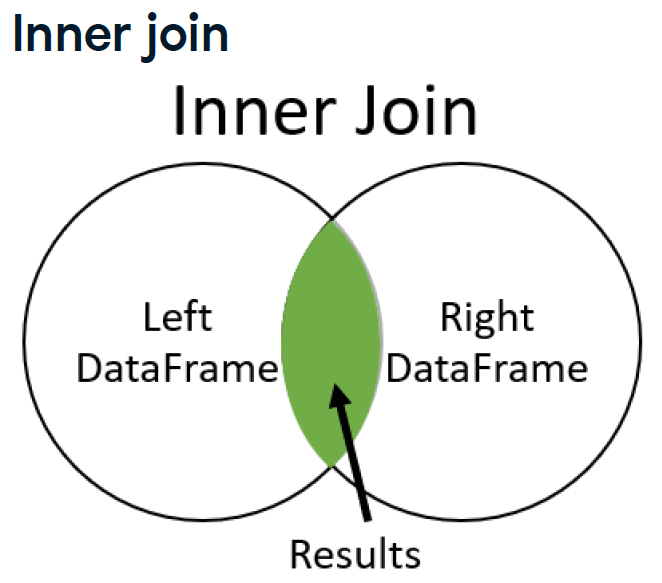

In [5]:
import os, pandas as pd
from datetime import datetime, timedelta
from random import randint, choice
from string import ascii_letters, ascii_lowercase, ascii_uppercase
lvow = ['a','e','i','o','u']
lcon = [ ch for ch in ascii_lowercase if ch not in lvow ]

In [6]:
def fngen():
    nlen = randint(3,7)
    fl = choice(ascii_uppercase)
    v = "".join([ choice(lvow) for n in range(nlen//3) ])
    c = choice(lcon)
    w = "".join([ choice(ascii_lowercase) for n in range(nlen-len(v)-2)]) 
    return f"{fl}{v}{c}{w}"

def lngen():
    nlen = randint(4,10)
    fl = choice(ascii_uppercase)
    v = "".join([ choice(lvow) for n in range(nlen//2) ])
    c = choice(lcon)
    w = "".join([ choice(ascii_lowercase) for n in range(nlen-len(v)-2)]) 
    return f"{fl}{v}{c}{w}"

def ngen():
    return (fngen(),lngen())

#-----#

def dobgen():
    max_age = 122
    # max based on age at death of oldest known person to have ever lived (Jeanne Calmet)
    lastbd = datetime.now()
    firstbd = lastbd - timedelta(days=max_age*365)
    bdtimestamps = pd.date_range(firstbd,lastbd)
    bdays = [ts.date() for ts in bdtimestamps]
    return choice(bdays)

def adgen():
    last = datetime.now()
    first = last - timedelta(days=28)
    
    daterange=[]
    current = first
    while current <= last:
        daterange.append(current)
        current += timedelta(seconds=1)
    
    # adtimestamps = pd.date_range(first,last)
    adt = choice(daterange)
    loatd = last - adt
    d = loatd.days
    h,m,s = str(timedelta(seconds=loatd.seconds)).split(':')
    loastr = f"{d}d, {h}h:{m}m:{s}s"
    return (adt, loastr)
    

print(f"{" ".join(list(ngen()))}, born {dobgen()}, admitted {adgen()}")

str(list(adgen())[0])

Aodr Jioisg, born 1938-06-11, admitted (datetime.datetime(2025, 2, 4, 5, 57, 52, 83354), '4d, 12h:16m:33s')


'2025-01-25 18:33:12.559984'

In [7]:
wards = ['RP','HH','K','ED','ADU','ICU']
bsexs = ['M','F']

def ptgen():
    fn,ln = ngen()
    dob = dobgen()
    dtage = datetime.now().date() - dob
    age = dtage // timedelta(days=365)
    bsx = choice(bsexs)
    if bsx == 'F':
        all_wards = wards + ['GYN']
        if age < 50:
            all_wards.append('LD')
    else:
        all_wards = wards
    dpt = choice(all_wards)
    adt, loa = adgen()
    return {'First Name':fn,
            'Last Name':ln,
            'DOB':dob,
            'Age (years)':age,
            'Sex':bsx,
            'Admission Date':adt,
            'Department':dpt, 
            'Length of Admission':loa}
    
ptlist = [ ptgen() for n in range(100) ]

ptdf = pd.DataFrame(ptlist)

ptdf.head()

,First Name,Last Name,DOB,Age (years),Sex,Admission Date,Department,Length of Admission
0,Hom,Loidx,1942-04-27,82,M,2025-01-12 01:12:02.051282,HH,"27d, 17h:02m:24s"
1,Augpi,Ouux,2003-02-20,21,F,2025-02-05 11:05:05.543818,HH,"3d, 7h:09m:21s"
2,Voh,Meeeatlbm,1911-04-29,113,M,2025-01-19 10:16:38.032238,HH,"20d, 7h:57m:49s"
3,Jiokat,Ouuyy,1931-06-29,93,M,2025-01-30 16:47:11.513192,ADU,"9d, 1h:27m:16s"
4,Roezsns,Muunn,2019-11-04,5,M,2025-02-08 12:27:29.995161,K,"0d, 5h:46m:58s"


In [8]:
ptdf.groupby('Department').agg({'Age (years)':'mean'})

,Age (years)
Department,
ADU,66.166667
ED,64.000000
GYN,58.222222
HH,57.062500
ICU,63.363636
K,51.777778
LD,17.333333
RP,73.312500


In [9]:
ptdf.groupby('Last Name').agg({'Age (years)':'mean'})

,Age (years)
Last Name,
Aeootnq,3.0
Aeovo,48.0
Aiaeuumjcy,29.0
Aieouvslu,74.0
Aouiibpnt,38.0
...,...
Zeieiepzul,88.0
Zeiya,73.0
Zooeibyxb,27.0


In [10]:
ptdf.sort_values('Admission Date')

,First Name,Last Name,DOB,Age (years),Sex,Admission Date,Department,Length of Admission
59,Loipgcr,Aouiibpnt,1986-10-25,38,M,2025-01-11 20:00:57.103065,K,"27d, 22h:13m:57s"
38,Nuonoq,Buah,1945-10-22,79,F,2025-01-11 21:13:20.220591,RP,"27d, 21h:01m:24s"
0,Hom,Loidx,1942-04-27,82,M,2025-01-12 01:12:02.051282,HH,"27d, 17h:02m:24s"
51,Iouyuv,Uoooawyr,1929-09-17,95,M,2025-01-12 21:39:57.355319,ICU,"26d, 20h:34m:53s"
31,Huj,Saauvns,1989-07-25,35,M,2025-01-12 22:40:57.917849,ED,"26d, 19h:33m:43s"
...,...,...,...,...,...,...,...,...
10,Bux,Vaeq,1950-06-11,74,F,2025-02-07 15:10:56.873129,ED,"1d, 3h:03m:34s"
88,Zekq,Eioerf,1978-08-04,46,M,2025-02-07 19:09:53.660982,HH,"0d, 23h:05m:14s"
54,Vuidpa,Vaok,2003-04-25,21,M,2025-02-08 11:48:58.763754,HH,"0d, 6h:25m:53s"
13,Ruc,Suif,1949-02-23,76,M,2025-02-08 12:23:13.302065,HH,"0d, 5h:51m:19s"


### Skills Assessment - Notes

#### Using Seaborn with Matplotlib

##### Import Statements

The conventional import statement is:

In [1]:
import seaborn as sns

In order to view plots, it seems matplotlib is still required:

In [2]:
import matplotlib.pyplot as plt

##### Lineplots

Using the ```ptdf``` DataFrame from before, let's add a column for heart rate data so we can plot age by HR.

In [14]:
ptdf['HR'] = [ randint(60,150) for i in range (100) ]
ptdf.head()

,First Name,Last Name,DOB,Age (years),Sex,Admission Date,Department,Length of Admission,HR
0,Hom,Loidx,1942-04-27,82,M,2025-01-12 01:12:02.051282,HH,"27d, 17h:02m:24s",109
1,Augpi,Ouux,2003-02-20,21,F,2025-02-05 11:05:05.543818,HH,"3d, 7h:09m:21s",147
2,Voh,Meeeatlbm,1911-04-29,113,M,2025-01-19 10:16:38.032238,HH,"20d, 7h:57m:49s",74
3,Jiokat,Ouuyy,1931-06-29,93,M,2025-01-30 16:47:11.513192,ADU,"9d, 1h:27m:16s",124
4,Roezsns,Muunn,2019-11-04,5,M,2025-02-08 12:27:29.995161,K,"0d, 5h:46m:58s",79


When simply using ```matplotlib.pyplot```, a ```pandas``` DataFrame itself has the ```df.plot()``` method built into it, and you can pass in a string for the ```type=``` parameter to indicate the type of plot.  As a result of the method belonging to the DataFrame itself, you simply pass in the column names as arguments for the x and y axes.

In Seaborn, you can similarly pass in the column names as strings, but instead of calling the plot method as a method of the dataframe itself, you pass the dataframe as an argument of the ```data=``` paramater of the plot method used.  In this case, the method is ```sns.lineplot()```:

<Axes: xlabel='Age (years)', ylabel='HR'>

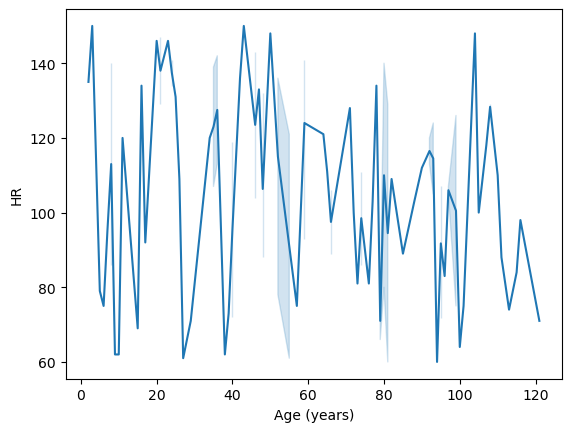

In [16]:
sns.lineplot(x='Age (years)',y='HR',data=ptdf)

But perhaps you don't need to even pass in an argument for the data= param?

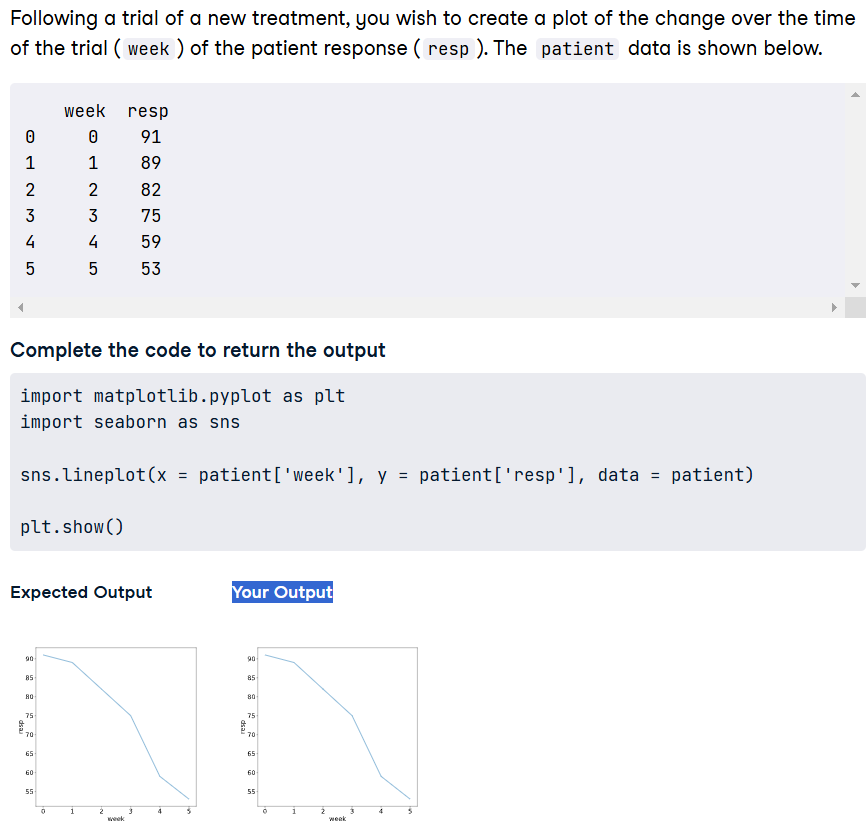

I mean I did pass in the dataframe itself (patient), but I went ahead and called the actual column of the dataframe independently for x and y instead of just passing in the column name as a string for each.

In [17]:
plt.show()

#### Seaborn - Swarm Plots???

Apparently the syntax is (after import statements)

```python

ax = sns.swarmplot( x= '<column of the df to use as x-values>',
                    y= '<column of the df to use as y-values>',
                    hue= '<column of the df to color code by>',
                    data= '<dataframe>' )

plt.show()

```


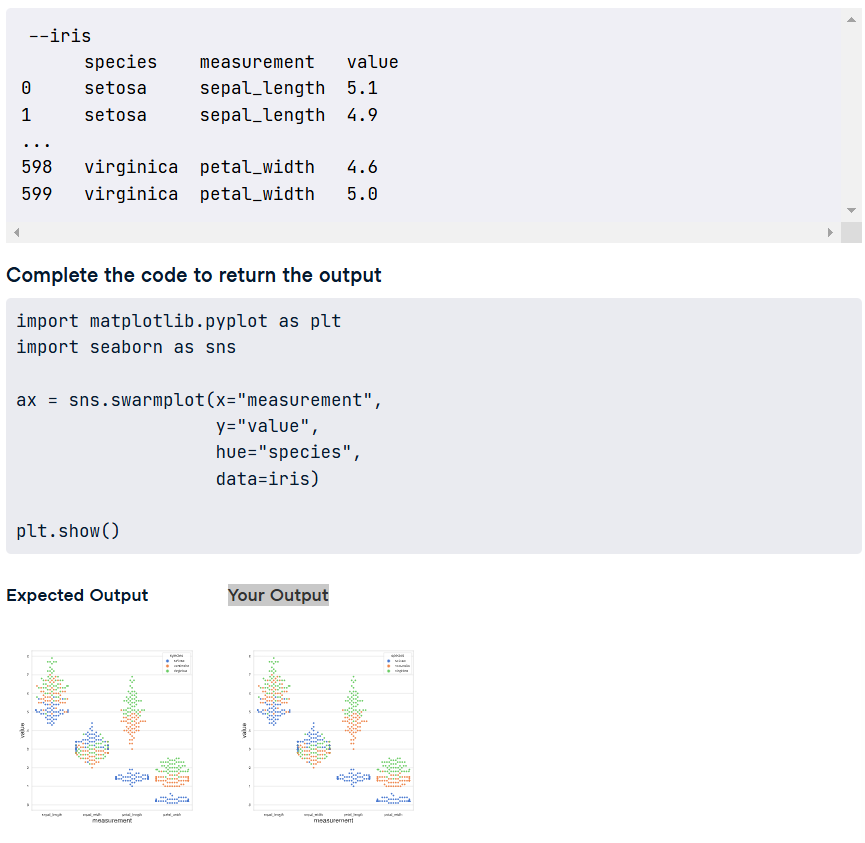

#### What is a JOINTPLOT???

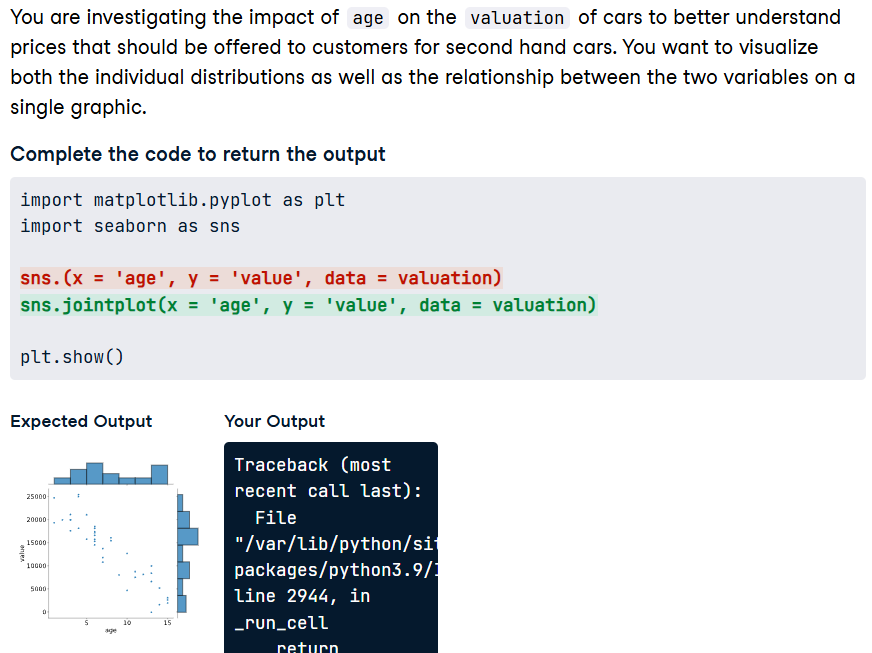

It's basically as it looks - a scatterplot with individual distributions for each variable superimposed next to the axes.  That way, you can look for relationships between two variables while simultaneously seeing how each is distributed, thereby parsing out potential outliers and other characteristics of the data only visualized via their distributions.

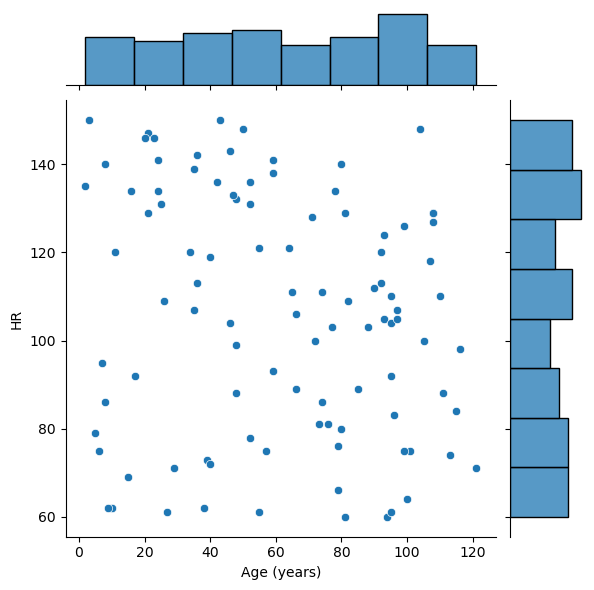

In [51]:
sns.jointplot(x='Age (years)',y='HR',data=ptdf)

#### What is a COUNTPLOT?

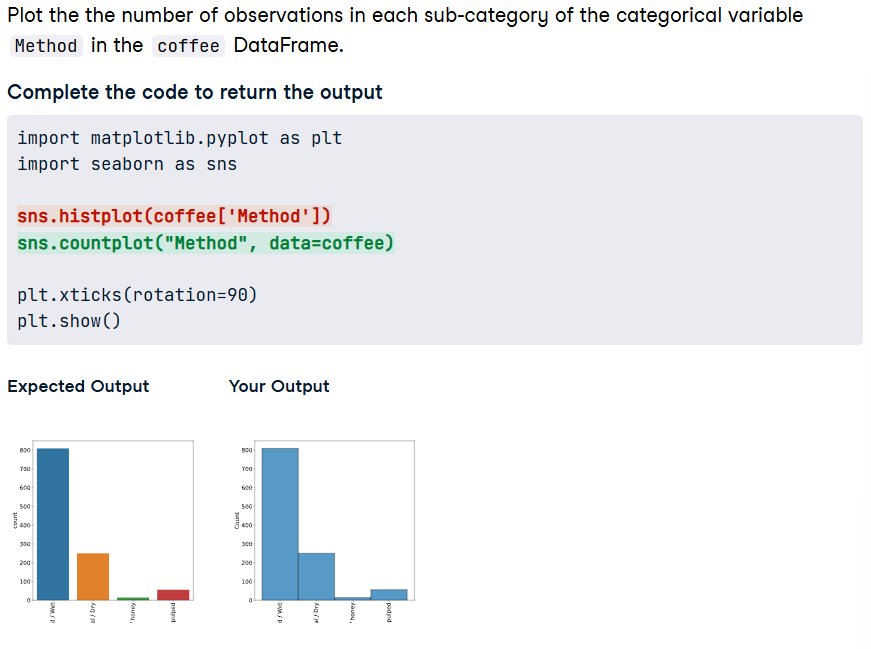

While a **histogram** takes the frequencies / counts of measurements that fall into certain bins of a quantitative variable (e.g., number of people in various age ranges), a **countplot** does this for categorical variables (e.g., the number of people wearing black, white, or brown shoes).

<Axes: xlabel='Department', ylabel='count'>

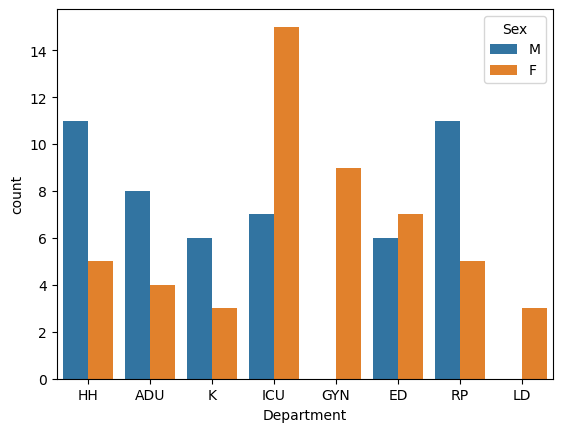

In [47]:
sns.countplot(ptdf,x="Department",hue='Sex')

<Axes: xlabel='Department', ylabel='Count'>

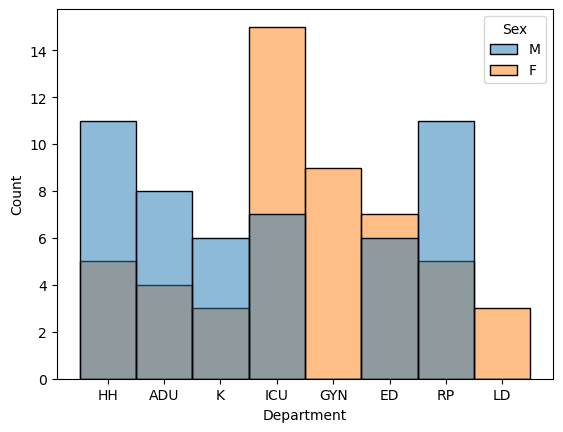

In [50]:
sns.histplot(x='Department',data=ptdf, hue='Sex')

##### DataFrame Index

In [23]:
ptdf['MRN'] = [ ''.join([str(randint(0,9)) for d in range(10)]) for m in range(100) ]
ptdf.head()

,First Name,Last Name,DOB,Age (years),Sex,Admission Date,Department,Length of Admission,HR,MRN
0,Hom,Loidx,1942-04-27,82,M,2025-01-12 01:12:02.051282,HH,"27d, 17h:02m:24s",109,5585750009
1,Augpi,Ouux,2003-02-20,21,F,2025-02-05 11:05:05.543818,HH,"3d, 7h:09m:21s",147,1573906222
2,Voh,Meeeatlbm,1911-04-29,113,M,2025-01-19 10:16:38.032238,HH,"20d, 7h:57m:49s",74,2117061375
3,Jiokat,Ouuyy,1931-06-29,93,M,2025-01-30 16:47:11.513192,ADU,"9d, 1h:27m:16s",124,5695511556
4,Roezsns,Muunn,2019-11-04,5,M,2025-02-08 12:27:29.995161,K,"0d, 5h:46m:58s",79,3973411580


In [24]:
pt_mrni = ptdf.set_index('MRN')
pt_mrni.head()

,First Name,Last Name,DOB,Age (years),Sex,Admission Date,Department,Length of Admission,HR
MRN,,,,,,,,,
5585750009,Hom,Loidx,1942-04-27,82,M,2025-01-12 01:12:02.051282,HH,"27d, 17h:02m:24s",109
1573906222,Augpi,Ouux,2003-02-20,21,F,2025-02-05 11:05:05.543818,HH,"3d, 7h:09m:21s",147
2117061375,Voh,Meeeatlbm,1911-04-29,113,M,2025-01-19 10:16:38.032238,HH,"20d, 7h:57m:49s",74
5695511556,Jiokat,Ouuyy,1931-06-29,93,M,2025-01-30 16:47:11.513192,ADU,"9d, 1h:27m:16s",124
3973411580,Roezsns,Muunn,2019-11-04,5,M,2025-02-08 12:27:29.995161,K,"0d, 5h:46m:58s",79


In [25]:
pt_mrni.index

Index(['5585750009', '1573906222', '2117061375', '5695511556', '3973411580',
       '2936671024', '0169449931', '5243611114', '9570626111', '2094380626',
       '9116320444', '4759845296', '1305855202', '5802502852', '9783447984',
       '0161899697', '6804994968', '6542657935', '6500124380', '8782053380',
       '1260628794', '5405219003', '9555807181', '6703459282', '4157054667',
       '5762297840', '7295717809', '1589044974', '0906790254', '2316676335',
       '3332677618', '5032573067', '3732820182', '1795151615', '2627302901',
       '0540131239', '2545524610', '5305290600', '4837244935', '0916520501',
       '8841920640', '5305515771', '2390742743', '0453597236', '4544280146',
       '3459992622', '3681074793', '7033505509', '4106320793', '6171747308',
       '1729689771', '8509959296', '2279223123', '7591003712', '1733761505',
       '3605206755', '8869857616', '7557387167', '4682882816', '6110880275',
       '1192343975', '4559895147', '5150910058', '9767010065', '7562885776',

In [26]:
ptdf.index

RangeIndex(start=0, stop=100, step=1)

In [27]:
type(pt_mrni.index)

pandas.core.indexes.base.Index

In [28]:
type(ptdf.index)

pandas.core.indexes.range.RangeIndex

In [29]:
ptdf.columns

Index(['First Name', 'Last Name', 'DOB', 'Age (years)', 'Sex',
       'Admission Date', 'Department', 'Length of Admission', 'HR', 'MRN'],
      dtype='object')

In [30]:
type(ptdf.columns)

pandas.core.indexes.base.Index

The data object when you call the ```.columns``` attribute of a DataFrame is of the same exact class/type as that when you call the ```.index``` attribute if one of the columns was set as the index.  The difference is that the columns will not collectively have a ```name=``` that comes after the ```dtype=```, while an column that has been turned into an index will of course have a column name that comes with it.

Meanwhile, the default numeric index that is given to a DataFrame upon creation is of a different subcategory of indexes (```range.RangeIndex```).

## 19.2 | SQL Skills for Data Science

### GENERAL REFERENCE / REVIEW

#### SQL Order of Operations

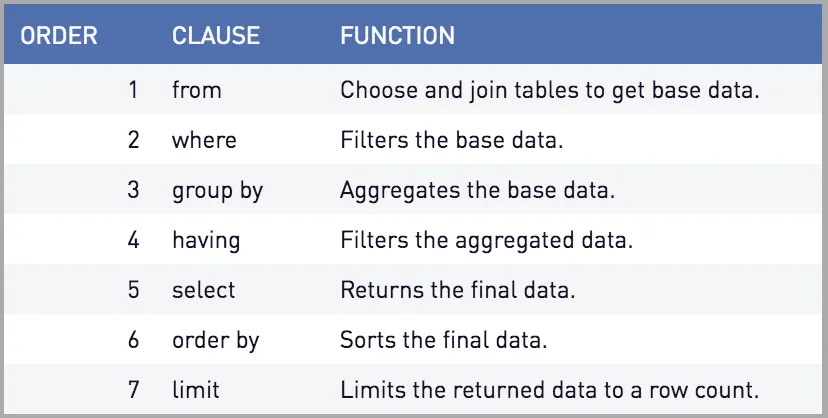
Source: [Medium](https://medium.com/@t.rosen2101/sql-order-of-operations-241707a7d921)

#### Annotations / Comments

```SQL
-- in-line (single line) comment

/* multi-line
comment */
```

#### Recommended Reading
[Hollywell's SQL Style Guide](https://www.sqlstyle.guide/)

### COMMON PITFALLS / POINTS OF CONFUSION

* ***String Syntax*** - in SQL, use single quotes (') for string literals, not double quotes (")
        e.g.,
  ```SQL
  SELECT *
  FROM table_name
  WHERE column_name IN ('val1','val2','val3')
  ```

This should filter for only rows in which the value under ```column_name``` is equal to one of the three values inside the parentheses.  Unlike with many programming languages, (') and (") are not interchangeable, so had it been  ```("val1",'val2','val3')```, instead, the result would be an error that says that "val1" doesn't exist.
* 

### DataCamp - Data Manipulation in SQL

#### CASE

The CASE statement is essentially SQL's way of doing conditional statements.  In python, conditional statements might look like this:

Python Example:
```python
if x = 1:
    print('a')
elif x =2:
    print('b')
else:
    print('c')
```

The ```if``` keyword is used for the first condition, and then ```elif``` for every subsequent condition, and ```else``` to cover all conditions that don't fall under the preceding conditions. Unlike many languages, the "then" is implied by the ```:``` that follows the condition.

While SQL uses ```ELSE``` in much the same way, it has a single keyword for all preceding conditions: ```WHERE```.  Additionally, like many languages other than python (e.g., bash), a ```THEN``` keyword is required to indicate what to do if the condition is met, along with a keyword to mark the end of the conditional statement -- in the case of SQL, this is literally ```END``` (more intuitive than ```fi```, as used in bash).  And prior to all of this, SQL uses the ```CASE``` keyword to indicate that what follows is a conditional statement (likely required to resolve ambiguity since the ```WHEN``` keyword is also used in other contexts?).

SQL Example
```SQL
CASE WHEN x = 1 THEN 'a'
     WHEN x = 2 THEN 'b'
     ELSE 'c' END AS new_column
```

While general programming languages allow a great variety of actions to be taken if a condition is met, the element that follows ```THEN``` is simply a data value -- that is, the ultimate point of a ```CASE``` statement is to generate a new column, and the conditionals within it determine what value is assigned to a given entry within that column.  In the above example, the new column is aliased as ```new_column```. 

# Interesting Notes / Observations

A useful mathematical truth: the average of booleans for all variables is a proper fraction, which is the percentage / 100.  Normally, you calculate a percentage of a given category by adding up all the instances of that category and dividing by all instances of all categories.  But what if you had a collection of data points, each of which had a boolean for all the categories?  

EXAMPLE: a table called fruits, with fields that include "is_apple", "is_orange", "weight", "date_picked", etc.

Each entry is information on a single fruit in an inventory, that only contains apples and oranges.  To calculate the percentage of apples, you could add up all the rows in which is_apple is True (which, if the programming language treates True=1, False=0, means simply summing the whole field), add up all rows, then divide the first value by the second.... or you could take the average of all values in the is_apple field and multiply the result by 100.